<a href="https://colab.research.google.com/github/abdullahkrs/e-Portfolio-Machine-Learning-January-2025/blob/main/Unit06_KMeans_Wine_TaskB_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🍷 Unit 6 Seminar: K-Means Clustering on Wine Dataset

This notebook performs **K-Means Clustering** on the UCI **Wine dataset**.

---

## 📌 Task B: Wine Data Clustering
- Load `wine.csv`
- Remove the target column `Wine` before clustering
- Apply **KMeans** clustering with **K=3**
- Compare predicted clusters with actual wine classes
- Visualize using PCA

---


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import io

# Upload wine.csv
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Unit06_wine.csv']))

df.head()


Saving Unit06_wine.csv to Unit06_wine.csv


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:

# Separate features and target
X = df.drop('Wine', axis=1)
y = df['Wine']

# KMeans clustering (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

df[['Wine', 'cluster']].head()


,Wine,cluster
0,1,1
1,1,1
2,1,2
3,1,2
4,1,1


In [4]:

# Encode target for confusion matrix
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Confusion matrix
conf_mat = confusion_matrix(y_encoded, df['cluster'])
conf_df = pd.DataFrame(conf_mat,
                       index=[f"Class {label}" for label in le.classes_],
                       columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])
conf_df


,Cluster 0,Cluster 1,Cluster 2
Class 1,1,31,27
Class 2,64,7,0
Class 3,37,11,0


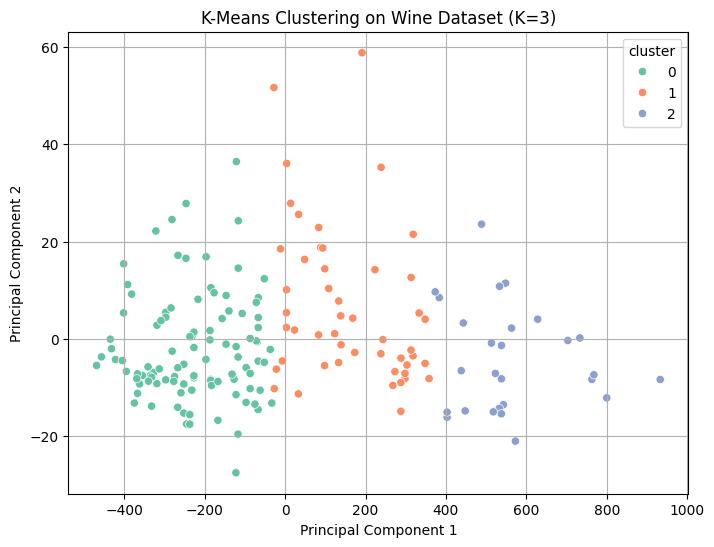

In [5]:

# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("K-Means Clustering on Wine Dataset (K=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()



## ✅ Summary

- KMeans clustering was applied to the Wine dataset using K=3.
- The predicted clusters were compared to actual wine types (1, 2, 3).
- A 2D PCA plot was used to visualize the clusters and separation.
- This exercise demonstrates unsupervised classification in high-dimensional data.

---
